## Project Mission

The purpose of this project is to analyze data of used car listings. This project will showcase my extensive knowledge of both the Pandas and NumPy libararies. In addition, I will learn about which German car manufacturers are most consumer friendly in terms of performance and price.

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stringcase

In [2]:
#Read csv file
autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [3]:
#Create a cell with the variable autos
autos.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,$480.00,test,NaN,1993.0,manuell,0.0,golf,"150,000km",0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,"$18,300.00",test,coupe,2011.0,manuell,190.0,NaN,"125,000km",5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,"$9,800.00",test,suv,2004.0,automatik,163.0,grand,"125,000km",8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,"$1,500.00",test,kleinwagen,2001.0,manuell,75.0,golf,"150,000km",6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,"$3,600.00",test,kleinwagen,2008.0,manuell,69.0,fabia,"90,000km",7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17
5,4/4/2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,$650.00,test,limousine,1995.0,manuell,102.0,3er,"150,000km",10.0,benzin,bmw,ja,4/4/2016 0:00,0.0,33775.0,4/6/2016 19:17
6,4/1/2016 20:48,Peugeot_206_CC_110_Platinum,privat,Angebot,"$2,200.00",test,cabrio,2004.0,manuell,109.0,2_reihe,"150,000km",8.0,benzin,peugeot,nein,4/1/2016 0:00,0.0,67112.0,4/5/2016 18:18
7,3/21/2016 18:54,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,$0.00,test,limousine,1980.0,manuell,50.0,andere,"40,000km",7.0,benzin,volkswagen,nein,3/21/2016 0:00,0.0,19348.0,3/25/2016 16:47
8,4/4/2016 23:42,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,"$14,500.00",control,bus,2014.0,manuell,125.0,c_max,"30,000km",8.0,benzin,ford,NaN,4/4/2016 0:00,0.0,94505.0,4/4/2016 23:42
9,3/17/2016 10:53,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,$999.00,test,kleinwagen,1998.0,manuell,101.0,golf,"150,000km",0.0,NaN,volkswagen,NaN,3/17/2016 0:00,0.0,27472.0,3/31/2016 17:17


In [4]:
#Print info about the autos dataframe
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371542 entries, 0 to 371541
Data columns (total 20 columns):
dateCrawled            371539 non-null object
name                   371539 non-null object
seller                 371538 non-null object
offerType              371538 non-null object
price                  371538 non-null object
abtest                 371538 non-null object
vehicleType            333669 non-null object
yearOfRegistration     371537 non-null float64
gearbox                351329 non-null object
powerPS                371538 non-null float64
model                  351054 non-null object
odometer               371538 non-null object
monthOfRegistration    371537 non-null float64
fuelType               338151 non-null object
brand                  371537 non-null object
notRepairedDamage      299477 non-null object
dateCreated            371537 non-null object
nrOfPictures           371537 non-null float64
postalCode             371537 non-null float64
lastSeen  

A quick observation shows that this dataset features a variety of brands and model cars. The year of registration is a wide range between the 1980s to the year 2016 when these ads were created. Regardless of the registration year, prices still vary between as low as 90 dollars to as high as 48,000 dollars. It apears the condition and the scarcity of models has affected the price.

The dataset has 20 columns which are strings. Some columns have null values, but no columns have more than 20% of null values. Column names are in camelcase and need to be converted into snakecase.


In [5]:
#Print an existing array of columns
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
#Make edits to column names
autos = autos.rename(columns = {'yearOfRegistration': 'registration_year', 'monthOfRegistration': 'registration_month', 'notRepairedDamage': 'unrepaired_damage', 'dateCreated': 'ad_created'})

In [7]:
#Use the stringcase library as the axis style parameter
autos = autos.rename(stringcase.snakecase, axis='columns')

In [8]:
#Look at the current state of the dataframe
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,$480.00,test,NaN,1993.0,manuell,0.0,golf,"150,000km",0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,"$18,300.00",test,coupe,2011.0,manuell,190.0,NaN,"125,000km",5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,"$9,800.00",test,suv,2004.0,automatik,163.0,grand,"125,000km",8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,"$1,500.00",test,kleinwagen,2001.0,manuell,75.0,golf,"150,000km",6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,"$3,600.00",test,kleinwagen,2008.0,manuell,69.0,fabia,"90,000km",7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


I changed the column names from camelcase to snakecase to make the columns more readable. I also changed columns such as "notRepairedDamage" to "unrepaired_damage" because to make the columns less awkward to read.

In [9]:
#Explore all categorical and numerical columns in the dataset
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,371539,371539,371538,371538,371538,371538,333669,371537.000000,351329,371538.000000,351054,371538,371537.000000,338151,371537,299477,371537,371537.0,371537.000000,371537
unique,15623,233526,3,3,5597,3,9,NaN,3,NaN,252,14,NaN,7,40,2,114,NaN,NaN,18705
top,3/5/2016 14:25,Ford_Fiesta,privat,Angebot,$0.00,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,4/3/2016 0:00,NaN,NaN,4/7/2016 6:45
freq,68,657,371534,371525,10778,192591,95896,NaN,274219,NaN,30070,240802,NaN,223863,79640,263189,14451,NaN,NaN,708
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.577883,NaN,115.548840,NaN,NaN,5.734473,NaN,NaN,NaN,NaN,0.0,50820.666402,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.865496,NaN,192.137238,NaN,NaN,3.712383,NaN,NaN,NaN,NaN,0.0,25799.080292,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71546.000000,NaN


The columns "seller", "offer_type", and nr_of_pictures" do not appear to have more than 1 unique value and thus can be dropped.  Both the columns "price" and "odometer" have been stored as text and need to be stored as numeric values instead.

In [10]:
#Drop the seller, offer_type, and nr_of_pictures columns
autos = autos.drop(['seller', 'offer_type', 'nr_of_pictures'], axis=1)

In [11]:
#Convert the 'price' and 'odometer' column to a string to remove the text characters
autos['price'] = autos['price'].astype(str).str.replace('$', '').str.replace(',', '').str.replace('nan', '')
autos['odometer'] = autos['odometer'].astype(str).str.replace('km', '').str.replace(',', '').str.replace('nan', '')

In [12]:
#Convert the price and odometer columns to numeric values
autos[['price', 'odometer']] = autos[['price', 'odometer']].apply(pd.to_numeric) 
print(autos.dtypes) 

date_crawled           object
name                   object
price                 float64
abtest                 object
vehicle_type           object
registration_year     float64
gearbox                object
power_p_s             float64
model                  object
odometer              float64
registration_month    float64
fuel_type              object
brand                  object
unrepaired_damage      object
ad_created             object
postal_code           float64
last_seen              object
dtype: object


In [13]:
#Rename the 'odometer' column to 'odometer_km'
autos = autos.rename(columns={'odometer': 'odometer_km'})

In [14]:
#Check the unique value counts of the price column
price_uniq = autos['price'].nunique()
price_uniq

5597

In [15]:
#Check the count of each price values
price_value_counts = autos['price'].value_counts()
price_value_counts.sort_index(ascending=True).head(15)

0.0     10778
1.0      1189
2.0        12
3.0         8
4.0         2
5.0        26
7.0         3
8.0         9
9.0         8
10.0       84
11.0        5
12.0        8
13.0        7
14.0        5
15.0       27
Name: price, dtype: int64

In [16]:
#Delete the rows with price outliers
autos = autos.drop(autos[autos.price < 2].index)

In [17]:
#View statistical data and format the scientific notation
price_desc = autos['price'].describe().apply(lambda x: format(x, 'f'))
price_desc

count        359571.000000
mean          17871.051364
std         3647120.688186
min               2.000000
25%            1250.000000
50%            3000.000000
75%            7499.000000
max      2147483647.000000
Name: price, dtype: object

In [18]:
#Count the number of unique values in the odometer_km column
odometer_uniq = autos['odometer_km'].nunique()
odometer_uniq

14

In [19]:
#Check the count of the odometer_km values
odometer_value_counts = autos['odometer_km'].value_counts()
odometer_value_counts.sort_index(ascending=True).head(15)

5000.0        5860
10000.0       1855
20000.0       5526
30000.0       5928
40000.0       6320
42459.0          1
50000.0       7531
60000.0       8587
70000.0       9660
80000.0      10890
90000.0      12340
100000.0     15436
125000.0     37315
150000.0    232322
Name: odometer_km, dtype: int64

In [20]:
#Delete the rows with odometer outliers
autos = autos.drop(autos[autos.odometer_km > 149999].index)

In [21]:
#View statistical data and format scientific notation
odometer_desc = autos['odometer_km'].describe().apply(lambda x: format(x, 'f'))
odometer_desc

count    127249.000000
mean      81311.424522
std       37695.187270
min        5000.000000
25%       50000.000000
50%       90000.000000
75%      125000.000000
max      125000.000000
Name: odometer_km, dtype: object

In the price column, I removed the rows with just zero or one dollar entries as there were a great number of them. Those values also weren't profitable to any seller.  In the odometer column, there was a mass amount of 150000 km entries which I removed because those entires served as outliers that would skew my statistical analysis. Also, reaching 150000 km or more means that those automobiles have likely been driven to the point where they are completely undrivable.  

In [22]:
#Example the part of the dataframe which shows ad listings and ads that were crawled
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
1,3/24/2016 10:58,3/24/2016 0:00,4/7/2016 1:46
2,3/14/2016 12:52,3/14/2016 0:00,4/5/2016 12:47
4,3/31/2016 17:25,3/31/2016 0:00,4/6/2016 10:17
8,4/4/2016 23:42,4/4/2016 0:00,4/4/2016 23:42
14,3/21/2016 12:57,3/21/2016 0:00,4/6/2016 7:45


In [23]:
#Count the values of the date crawled column but put them in percentages
f = autos['date_crawled']
date_val_count = pd.concat([f.value_counts(), 
                f.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
date_val_count.head(5)

,counts,percentage
3/31/2016 17:50,27,0.021218
4/4/2016 16:50,26,0.020432
3/25/2016 13:39,26,0.020432
3/28/2016 14:49,25,0.019646
3/5/2016 17:45,25,0.019646


In [24]:
#Repeat steps above
g = autos['last_seen']
last_val_count = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
last_val_count.head(5)

,counts,percentage
4/6/2016 23:45,278,0.218471
4/7/2016 5:45,274,0.215328
4/6/2016 5:45,274,0.215328
4/7/2016 6:45,273,0.214542
4/7/2016 7:16,270,0.212184


Ads appear to be entered regularly and there isn't a particular point in time where there was a boost in the number of ads posted by crawlers.

In [25]:
#Repeat steps above
h = autos['ad_created']
ad_val_count = pd.concat([h.value_counts(), 
                h.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
ad_val_count.head(5)

,counts,percentage
4/3/2016 0:00,5275,4.145448
3/12/2016 0:00,4774,3.751729
4/4/2016 0:00,4771,3.749371
3/20/2016 0:00,4771,3.749371
4/2/2016 0:00,4628,3.636992


The value count above covers ads that were posted by a website.  It is interesting to see that a massive amount of ads for automobiles were posted between 4/3/2016 and 4/4/2016.  Perhaps a seasonal shift in demand caused this.

In [26]:
#Check statistical data
autos.describe()

,price,registration_year,power_p_s,odometer_km,registration_month,postal_code
count,1.272490e+05,127248.000000,127249.000000,127249.000000,127248.000000,127248.000000
mean,1.541646e+04,2008.481273,119.815724,81311.424522,5.924549,52121.730621
std,6.194562e+05,135.866375,211.342390,37695.187270,3.570938,26118.953406
min,2.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,2.700000e+03,2002.000000,69.000000,50000.000000,3.000000,31582.000000
50%,6.500000e+03,2008.000000,105.000000,90000.000000,6.000000,51503.000000
75%,1.300000e+04,2011.000000,150.000000,125000.000000,9.000000,73450.000000
max,1.000000e+08,9999.000000,19211.000000,125000.000000,12.000000,99998.000000


There is something wrong with the registration_year column.  The minimum value is "1000" and the maximum value is "9999."  This doesn't make sense.  To fix this problems, lets see if we can remove any outliers.

In [27]:
#Check the number of values that occur before the year 1900
reg_year_before = autos[(autos["registration_year"] < 1900)]
reg_before_val_count = reg_year_before["registration_year"].value_counts()
reg_before_val_count 

1000.0    29
1234.0     4
1800.0     4
1500.0     3
1300.0     2
1111.0     2
1602.0     1
1039.0     1
1600.0     1
1001.0     1
1255.0     1
1400.0     1
Name: registration_year, dtype: int64

In [28]:
#Check the number of values that occur after the year 2016 (the year the dataset was completed)
reg_year_after = autos[(autos["registration_year"] > 2016)]
reg_after_val_count = reg_year_after["registration_year"].value_counts()
reg_after_val_count

2017.0    2605
2018.0    1130
9999.0      19
5000.0      16
2019.0      10
6000.0       6
3000.0       5
7000.0       4
9000.0       4
2500.0       3
4000.0       3
5555.0       2
8888.0       2
4500.0       2
5911.0       2
6200.0       1
8200.0       1
7800.0       1
3800.0       1
3700.0       1
4100.0       1
7777.0       1
2290.0       1
2222.0       1
5900.0       1
8000.0       1
2066.0       1
2200.0       1
7100.0       1
5300.0       1
9450.0       1
7500.0       1
4800.0       1
2800.0       1
8500.0       1
5600.0       1
2900.0       1
3200.0       1
Name: registration_year, dtype: int64

It appears that the number of outlier values are small in comparison to the rest of the dataset and can be dropped.

In [29]:
#Drop the outlier rows from the dataframe
autos = autos[(autos["registration_year"] > 1900)]
autos = autos[(autos["registration_year"] < 2019)]

In [30]:
#Calculate the distribution
autos.describe()

,price,registration_year,power_p_s,odometer_km,registration_month,postal_code
count,1.270970e+05,127097.000000,127097.000000,127097.000000,127097.000000,127097.000000
mean,1.533223e+04,2005.720717,119.845047,81394.958182,5.930101,52130.859509
std,6.191807e+05,8.708368,211.122199,37633.316232,3.568225,26119.458492
min,2.000000e+00,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,2.700000e+03,2002.000000,69.000000,50000.000000,3.000000,31582.000000
50%,6.500000e+03,2008.000000,105.000000,90000.000000,6.000000,51515.000000
75%,1.300000e+04,2011.000000,150.000000,125000.000000,9.000000,73453.000000
max,1.000000e+08,2018.000000,19211.000000,125000.000000,12.000000,99998.000000


The mean and percentiles have not changed.  This means we don't have to worry about these outliers skewing our data.  However, the distribution looks clean and understandable now.  The mininum registration year is 1910 which makes sense because most cars were in mass production by the 1920s.

In [31]:
#Search dataframe based on the top 10 largest brands
brand_df = autos['brand'].value_counts().sort_values(ascending=False).head(10)
brand_df

volkswagen       23273
opel             12637
bmw              10064
mercedes_benz     9836
ford              9834
audi              8944
renault           6041
fiat              4538
peugeot           4298
smart             3716
Name: brand, dtype: int64

In [32]:
#Clean the dataset to show the brand in first column
autos = pd.DataFrame({'brand':brand_df.index}).merge(autos, how='left')
autos.head()

,brand,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,unrepaired_damage,ad_created,postal_code,last_seen
0,volkswagen,4/1/2016 19:56,Volkswagen_Scirocco_1.4_TSI_Sport,10400.0,control,coupe,2009.0,manuell,160.0,scirocco,100000.0,4.0,benzin,nein,4/1/2016 0:00,75365.0,4/5/2016 16:45
1,volkswagen,3/9/2016 11:56,Volkswagen_T3_andere,1990.0,test,bus,1981.0,manuell,50.0,transporter,5000.0,1.0,benzin,nein,3/9/2016 0:00,87471.0,3/10/2016 7:44
2,volkswagen,3/25/2016 14:40,VW_Golf_6___Klima___Alu___Scheckheft_!!!,7750.0,control,NaN,2017.0,manuell,80.0,golf,100000.0,1.0,benzin,NaN,3/25/2016 0:00,48499.0,3/31/2016 21:47
3,volkswagen,3/8/2016 12:54,Volkswagen_Jetta_1.9_TDI_DSG_DPF_Sportline,7000.0,test,limousine,2006.0,automatik,105.0,jetta,100000.0,10.0,diesel,nein,3/8/2016 0:00,6242.0,3/11/2016 17:16
4,volkswagen,3/12/2016 22:57,Volkswagen_Polo_1.4_FSI_Team,9290.0,control,kleinwagen,2010.0,manuell,86.0,polo,40000.0,5.0,benzin,nein,3/12/2016 0:00,35630.0,3/26/2016 6:17


In [33]:
#Check all statistical data
autos.describe(include='all')

,brand,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,unrepaired_damage,ad_created,postal_code,last_seen
count,93181,93181,93181,9.318100e+04,93181,86359,93181.000000,89021,93181.000000,90376,93181.000000,93181.000000,87256,80631,93181,93181.000000,93181
unique,10,13178,59386,NaN,2,8,NaN,2,NaN,117,NaN,NaN,7,2,94,NaN,11964
top,volkswagen,4/3/2016 11:56,Ford_Fiesta,NaN,test,kleinwagen,NaN,manuell,NaN,golf,NaN,NaN,benzin,nein,4/3/2016 0:00,NaN,4/6/2016 23:45
freq,23273,22,314,NaN,48550,25557,NaN,65508,NaN,9027,NaN,NaN,63912,75226,3841,NaN,210
mean,NaN,NaN,NaN,1.441015e+04,NaN,NaN,2005.885932,NaN,120.512444,NaN,82535.227139,5.952802,NaN,NaN,NaN,52478.837574,NaN
std,NaN,NaN,NaN,5.879025e+05,NaN,NaN,8.144547,NaN,219.679445,NaN,37655.553545,3.569854,NaN,NaN,NaN,25906.196358,NaN
min,NaN,NaN,NaN,2.000000e+00,NaN,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,2.600000e+03,NaN,NaN,2002.000000,NaN,69.000000,NaN,60000.000000,3.000000,NaN,NaN,NaN,32120.000000,NaN
50%,NaN,NaN,NaN,6.690000e+03,NaN,NaN,2008.000000,NaN,105.000000,NaN,90000.000000,6.000000,NaN,NaN,NaN,52064.000000,NaN
75%,NaN,NaN,NaN,1.380000e+04,NaN,NaN,2011.000000,NaN,150.000000,NaN,125000.000000,9.000000,NaN,NaN,NaN,73614.000000,NaN


I have choosen to aggregate my data based on the top largest brands in the dataset.  Next I would like to answer, what is the average price a user should look for when searching based on these top 10 brands?

In [34]:
#Calculate the average values of every column with a float dtype
brand_mean = autos.groupby('brand', as_index=False).mean()
brand_mean = autos.groupby('brand').mean().reset_index()
brand_mean.head(10)

,brand,price,registration_year,power_p_s,odometer_km,registration_month,postal_code
0,audi,30146.435599,2008.592017,177.110242,77557.580501,6.296623,57685.785331
1,bmw,19339.263712,2007.054948,181.254372,84009.340223,6.068959,57424.652723
2,fiat,6945.220141,2004.410093,68.460555,82025.121199,5.622741,55835.247686
3,ford,7156.246492,2004.588062,94.838214,84301.403295,5.684665,50620.456478
4,mercedes_benz,17055.058764,2005.297784,167.527857,82512.708418,6.196116,52786.000508
5,opel,5275.450740,2004.531693,98.940334,85794.888027,5.873229,51638.537944
6,peugeot,5136.723127,2006.129362,98.269660,86973.010703,5.842485,52769.555142
7,renault,4101.987585,2005.389340,80.994372,86983.943056,5.773547,48609.045026
8,smart,4198.618676,2006.712056,65.970129,81041.442411,6.205597,49885.769376
9,volkswagen,20612.780690,2006.112577,108.410218,79667.640614,5.915009,50161.116272


In [35]:
#Simplfy dataframe by dropping and renaming columns
#Sort columns by 'avg_price'
brand_mean = brand_mean.drop(['registration_year', 'power_p_s', 'registration_month', 'postal_code'], axis=1)
brand_mean = brand_mean.rename(columns={'price':'avg_price', 'odometer_km':'avg_odometer_km'})
brand_mean.sort_values(by='avg_price', ascending=False).head(10)

,brand,avg_price,avg_odometer_km
0,audi,30146.435599,77557.580501
9,volkswagen,20612.780690,79667.640614
1,bmw,19339.263712,84009.340223
4,mercedes_benz,17055.058764,82512.708418
3,ford,7156.246492,84301.403295
2,fiat,6945.220141,82025.121199
5,opel,5275.450740,85794.888027
6,peugeot,5136.723127,86973.010703
8,smart,4198.618676,81041.442411
7,renault,4101.987585,86983.943056


Text(0, 0.5, 'Average Price')

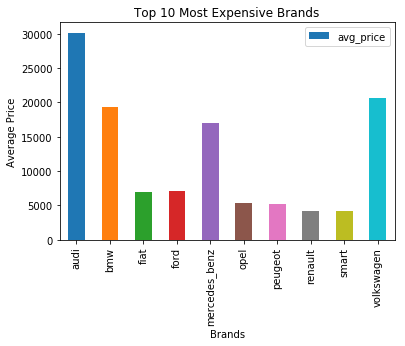

In [36]:
#Use Matplotlib to show the average price of each brand in a bar chart
ax = brand_mean.plot(x = 'brand', y = 'avg_price', kind = 'bar', title = 'Top 10 Most Expensive Brands')
ax.set_xlabel('Brands')
ax.set_ylabel('Average Price')

It appears that the Audi on average has the most expensive price out of all automobile brands.  However, when compared to other top brands, Audi used automobiles have less kilometers driven meaning less wear and tear on the vehicles.  There is a major drop off in average price between Mercedes-Benz and Ford automobiles.  There isn't a a big gap in kilometers driven between these brands, so users may receive better value from brands such as Ford and Fiat on eBay.

In [37]:
#Translate German words to English
autos['gearbox'] = autos['gearbox'].astype(str).str.replace('manuell', 'manuel').str.replace('automatik', 'automatic')
autos['unrepaired_damage'] = autos['unrepaired_damage'].astype(str).str.replace('ja', 'yes').str.replace('nein', 'no')
autos['fuel_type'] = autos['fuel_type'].astype(str).str.replace('benzin', 'petrol')

In [38]:
#Finalize original dataframe
autos.head()

,brand,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,unrepaired_damage,ad_created,postal_code,last_seen
0,volkswagen,4/1/2016 19:56,Volkswagen_Scirocco_1.4_TSI_Sport,10400.0,control,coupe,2009.0,manuel,160.0,scirocco,100000.0,4.0,petrol,no,4/1/2016 0:00,75365.0,4/5/2016 16:45
1,volkswagen,3/9/2016 11:56,Volkswagen_T3_andere,1990.0,test,bus,1981.0,manuel,50.0,transporter,5000.0,1.0,petrol,no,3/9/2016 0:00,87471.0,3/10/2016 7:44
2,volkswagen,3/25/2016 14:40,VW_Golf_6___Klima___Alu___Scheckheft_!!!,7750.0,control,NaN,2017.0,manuel,80.0,golf,100000.0,1.0,petrol,nan,3/25/2016 0:00,48499.0,3/31/2016 21:47
3,volkswagen,3/8/2016 12:54,Volkswagen_Jetta_1.9_TDI_DSG_DPF_Sportline,7000.0,test,limousine,2006.0,automatic,105.0,jetta,100000.0,10.0,diesel,no,3/8/2016 0:00,6242.0,3/11/2016 17:16
4,volkswagen,3/12/2016 22:57,Volkswagen_Polo_1.4_FSI_Team,9290.0,control,kleinwagen,2010.0,manuel,86.0,polo,40000.0,5.0,petrol,no,3/12/2016 0:00,35630.0,3/26/2016 6:17
